In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
import matplotlib.pylab as plt

2.18.0


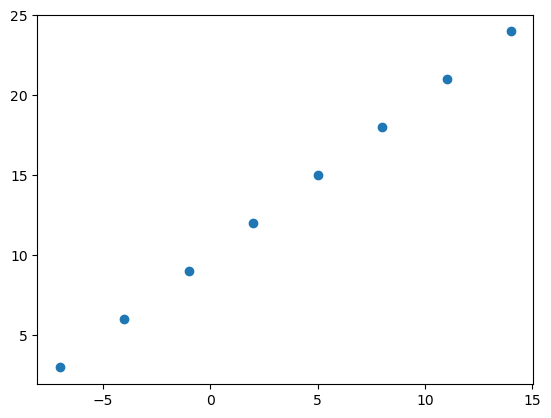

In [2]:
X = np.array([-7.0,-4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

In [3]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
X.shape, y.shape

((8,), (8,))

In [5]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [6]:
X = tf.expand_dims(tf.constant(X), axis=-1)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
# set random seed
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile model
loss_function = tf.keras.losses.mse
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
metrics = ["mse"]
model.compile(loss = loss_function, optimizer = opt, metrics = metrics)

# Fit model
model.fit(X, y, epochs = 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 251.5800 - mse: 251.5800
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 192.8825 - mse: 192.8825
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 152.8178 - mse: 152.8178
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 119.2741 - mse: 119.2741
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 87.2158 - mse: 87.2158
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 57.0211 - mse: 57.0211
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 33.1202 - mse: 33.1202
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 22.0531 - mse: 22.0531
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 28.8394 - mse: 28.8394
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 45.0550 - mse: 45.0550
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 53.4259 - mse: 53.4259
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 49.3556 - mse: 49.3556
Epoch 13/100
1/1 ━━

In [8]:
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [9]:
Xs = tf.constant([[17.0], [15.0], [13.0]])
ys = tf.constant([[27.0], [25.0], [23.0]])
y_pred = model.predict(Xs)
ys, y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


(<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[27.],
        [25.],
        [23.]], dtype=float32)>,
 array([[27.128508],
        [25.0479  ],
        [23.000008]], dtype=float32))

In [43]:
# make a bigger dataset

X = tf.range(-10000, 10000, 4)
X

<tf.Tensor: shape=(5000,), dtype=int32, numpy=array([-10000,  -9996,  -9992, ...,   9988,   9992,   9996])>

In [44]:
y = X +10
y

<tf.Tensor: shape=(5000,), dtype=int32, numpy=array([-9990, -9986, -9982, ...,  9998, 10002, 10006])>

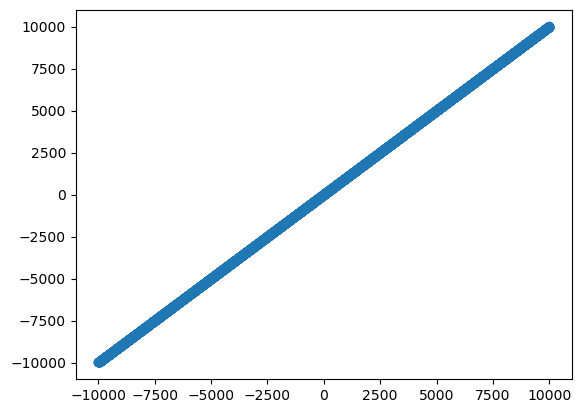

In [45]:
# visualize data
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [53]:
X = tf.expand_dims(tf.constant(X), axis=-1)

p = 0.8
i = int(p*len(X))

# split data into train andtest sets
X_train = X[:i]
X_test = X[i:]

y_train = y[:i]
y_test = y[i:]

len(X_train), len(y_train)

(4000, 4000)

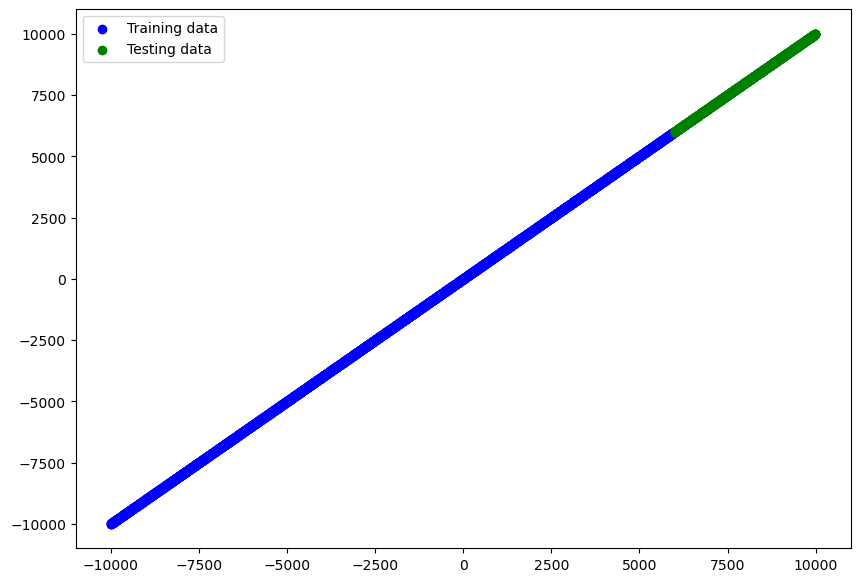

In [54]:
### visualizing the data

plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [106]:
# set random seed
tf.random.set_seed(43)
tf.keras.utils.set_random_seed(41)

# 1. create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name="regression_example")

# 2. compile model
model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ["mse"]
)

# 3. fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31223832.0000 - mse: 31223832.0000  
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 23953482.0000 - mse: 23953482.0000
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 23927030.0000 - mse: 23927030.0000
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 23884972.0000 - mse: 23884972.0000
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 23845902.0000 - mse: 23845902.0000
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 23810086.0000 - mse: 23810086.0000
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 23776466.0000 - mse: 23776466.0000
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 23744234.0000 - mse: 23744234.0000
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 23712804.0000 - mse: 23712804.0000
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 23681814.0000 - mse: 23681814.0000
Epoch 11/100
125/12

In [89]:
model.summary()

Model: "regression_example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (32, 1, 1)             │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (32, 1, 1)             │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (60.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10 (44.00 B)

In [90]:
y_pred = model.predict(X_test)
y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[[1062.5181]],

       [[1063.2406]],

       [[1063.963 ]],

       [[1064.6857]],

       [[1065.4081]],

       [[1066.1305]],

       [[1066.8531]],

       [[1067.5756]],

       [[1068.2981]],

       [[1069.0206]],

       [[1069.743 ]],

       [[1070.4656]],

       [[1071.1881]],

       [[1071.9106]],

       [[1072.633 ]],

       [[1073.3556]],

       [[1074.0781]],

       [[1074.8005]],

       [[1075.5232]],

       [[1076.2456]],

       [[1076.968 ]],

       [[1077.6907]],

       [[1078.4131]],

       [[1079.1356]],

       [[1079.8582]],

       [[1080.5806]],

       [[1081.3031]],

       [[1082.0256]],

       [[1082.7482]],

       [[1083.4706]],

       [[1084.1931]],

       [[1084.9156]],

       [[1085.6381]],

       [[1086.3606]],

       [[1087.0831]],

       [[1087.8055]],

       [[1088.5281]],

       [[1089.2506]],

       [[1089.9731]],

       [[1090.6956]],

       [[1091.4181]],

       [[1092.1406]],

       [[1092.863 ]],

       [[10

In [91]:
def plot_predictions(
        train_data = X_train,
        train_labels = y_train,
        test_data = X_test,
        test_labels = y_test,
        predictions = y_pred
):
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()
    plt.show()

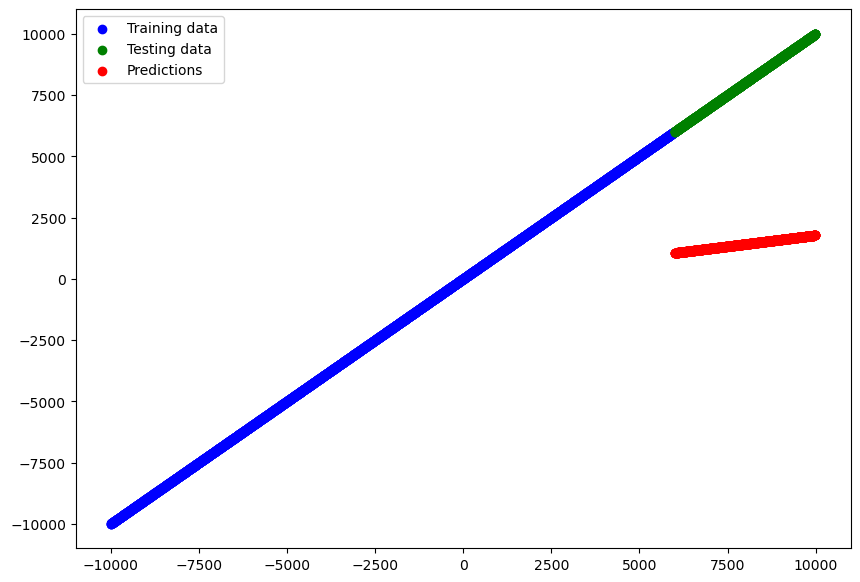

In [92]:
plot_predictions()